---

# <center>★ AI / ML Project - Image Denoising★
#### <center> ***Domain: Computer Vision***

<center><img src="https://raw.githubusercontent.com/Masterx-AI/Project_Image_denoising_using_Autoencoders/main/Autoencoders.png" style="width: 800px;"/>

---

### Description:

An autoencoder is a special type of neural network that is trained to copy its input to its output. For example, given an image of a handwritten digit, an autoencoder first encodes the image into a lower dimensional latent representation, then decodes the latent representation back to an image. An autoencoder learns to compress the data while minimizing the reconstruction error.

To learn more about autoencoders, please consider reading chapter 14 from Deep Learning by Ian Goodfellow, Yoshua Bengio, and Aaron Courville.


### Acknowledgement: 
The dataset is referred from Google

### Objective:
- Understand the Dataset & perform necessary Preprocessing.
- Design a Neural Network Architecture - Autoencoder Model.
- Train the autoencoder model to carry out image denoising process.

---

# <center> Stractegic Plan of Action:

**We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:**
1. Data Exploration
2. Data Pre-processing
3. Predictive Modelling
4. Project Outcomes & Conclusion

---

# <center>1. Data Exploration

In [1]:
# Importing the necessary libraries

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [2]:
# Since we only need images from the dataset to encode and decode, we
# won't use the labels.
(train_data, _), (test_data, _) = mnist.load_data()

def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array

# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

11501568/11490434 [==============================] - 0s 0us/step


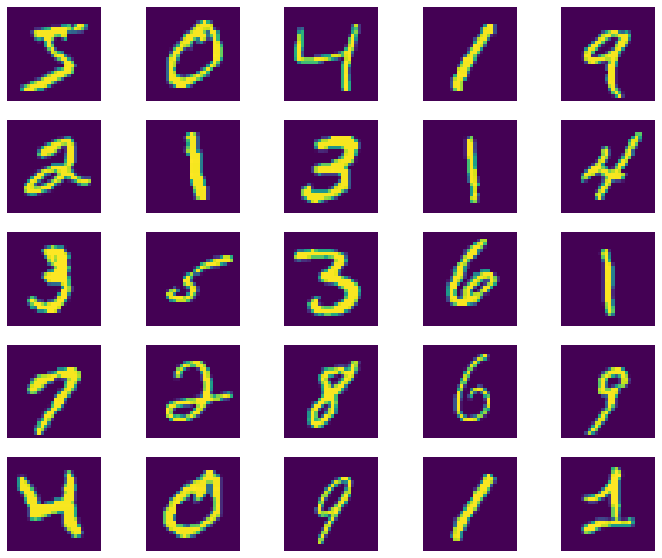

In [3]:
# Visualising the Dataset

n=25

plt.figure(figsize=[12,10])
for i in range(n):
    plt.subplot(5,5,i+1)
    plt.imshow(train_data[i])
    #plt.title(Class_names[y.numpy()])
    plt.axis('off')
plt.show()

---

# <center>2. Data Preprocessing

In [4]:
# Defining data preprocessing functions

def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

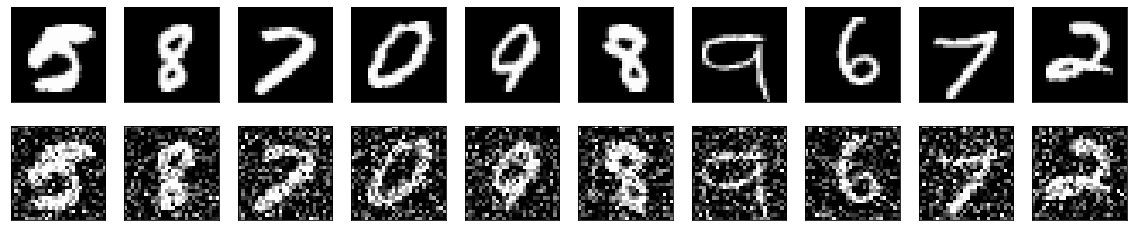

In [5]:
# Create a copy of the data with added noise
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

---

# <center>3. Predictive Modelling

In [6]:
# Constructing the Autoencoder Model Architecture

input = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 32)        9248  

2022-07-10 18:32:03.226124: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:
# Training the Autoencoder Model

autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

2022-07-10 18:32:03.595091: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
469/469 [==============================] - 40s 83ms/step - loss: 0.1807 - val_loss: 0.1066
Epoch 2/100
469/469 [==============================] - 38s 82ms/step - loss: 0.1021 - val_loss: 0.0979
Epoch 3/100
469/469 [==============================] - 38s 81ms/step - loss: 0.0972 - val_loss: 0.0945
Epoch 4/100
469/469 [==============================] - 39s 83ms/step - loss: 0.0946 - val_loss: 0.0928
Epoch 5/100
469/469 [==============================] - 39s 84ms/step - loss: 0.0931 - val_loss: 0.0913
Epoch 6/100
469/469 [==============================] - 38s 82ms/step - loss: 0.0919 - val_loss: 0.0906
Epoch 7/100
469/469 [==============================] - 38s 81ms/step - loss: 0.0911 - val_loss: 0.0897
Epoch 8/100
469/469 [==============================] - 38s 81ms/step - loss: 0.0904 - val_loss: 0.0894
Epoch 9/100
469/469 [==============================] - 38s 80ms/step - loss: 0.0899 - val_loss: 0.0889
Epoch 10/100
469/469 [==============================] - 39s 83ms/step - l

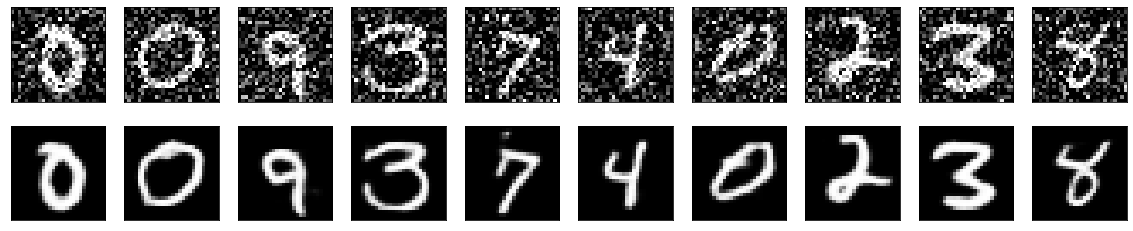

In [8]:
# Evaluating the trained Autoencoder Model

predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)

---

# <center>4. Outcomes & Project Conclusion

### Here are some of the key outcomes of the project:
- The  Image Dataset was large enough with 60k training samples & 10k testing samples.
- Visualising the image samples & it's distribution, helped us to get some insights into the dataset.
- Artificial data was created by adding noise to the existing image data.
- The Basic AutoEncoder Model performed surprisingly well in denoising the test images.
- Further improvisations can include the usage of advanced layers, or even utilizing the Transfer Learning Methodology to train Prebuilt Models.

In [9]:
#<<<--------------------------------------THE END---------------------------------------->>>